<a href="https://colab.research.google.com/github/Saurya-Acharya/COMP562-Final/blob/main/Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP 562 Final Project: Code Repository

#### Saurya Acharya, Jahnavi Alapati, Saketh Devareddy, Maya Krishnamoorthy, Sheel Patel

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

file_path = './creditcard.csv'

# Section 1: Data Set-up

**Balancing the data-set**

When inspecting the original data, we noticed that it is heavily unbalanced. Given 284,315 real transactions, we only had 492 fradulent transactions (0.172% of the dataset). In order to fix this before building and training our model, we split the dataset and rebalanced it by sampling 492 real transactions.

In [53]:
#Reading in data, and classifying as 0 = real, 1 = fradulent
data = pd.read_csv(file_path)

realTransactions = data[data.Class == 0]
fraudTransactions = data[data.Class == 1]

In [54]:
realTransactions.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [55]:
fraudTransactions.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [56]:
# Sampling 492 real transaction entries to balance the data
realTransactionsSample = realTransactions.sample(n=492)
combined = pd.concat([realTransactionsSample, fraudTransactions], axis=0)

In [57]:
# Confirming the new dataset: 492 real and 492 fradulent
combined.Amount.describe()

count     984.000000
mean       98.945488
std       218.703297
min         0.000000
25%         1.137500
50%        18.385000
75%        99.990000
max      2125.870000
Name: Amount, dtype: float64

**Training and Testing Datasets**

Then, to prepare the data for our models, we split our data into 80% training and 20% testing.

In [58]:
X = combined.drop(columns='Class', axis=1)
Y = combined['Class']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Section 2: Building Models

**Model #1: Random Forest**

After the data was set up, we decided to test two models and compare the metrics for each.

First, we trained a random forest model on the training data to then make predictions on the test data.

In [59]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, Y_train)
Y_pred = rf_classifier.predict(X_test)

We then wanted to check the accuracy of our Random Forest model.

In [60]:
print(f"Accuracy on Test Data using Random Forest Classification: \n{accuracy_score(Y_test, Y_pred)}")

Accuracy on Test Data using Random Forest Classification: 
0.9187817258883249


Then, we used similar logic to build a Logistic Regression model.

In [61]:
model = LogisticRegression(max_iter=10000)

# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
X_test_prediction = model.predict(X_test)

And analyzed the metrics for the Logistic Regression Model.

In [62]:
# accuracy on test data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print(f"Accuracy on Test Data using Logistic Regression: \n{test_data_accuracy}")

Accuracy on Test Data using Logistic Regression: 
0.9289340101522843


# Section 3: Analysis of Models

For both models, we created a confusion matrix and ROC curve to analyze the accuracy and effectiveness of our models.

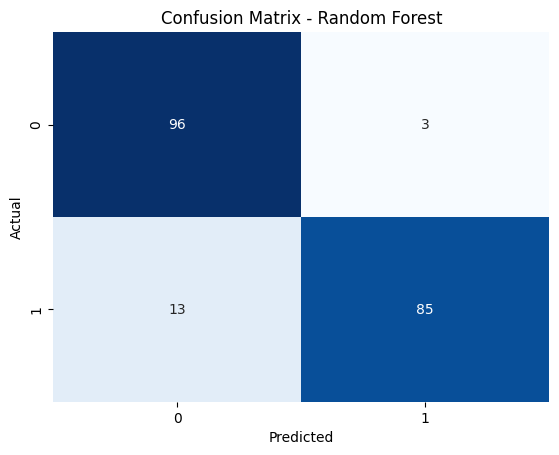

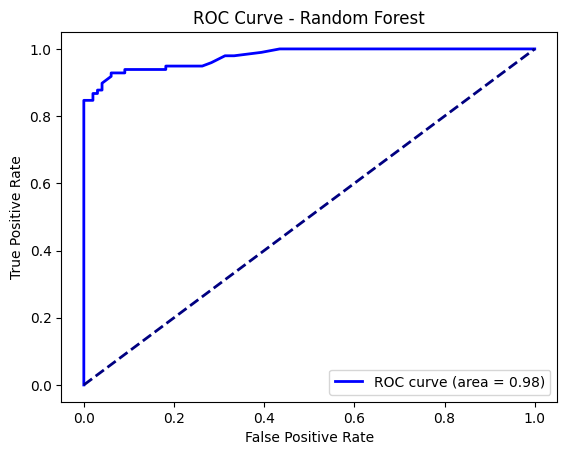

In [63]:
# Confusion Matrix and Visualization for Random Forest
conf_matrix_rf = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

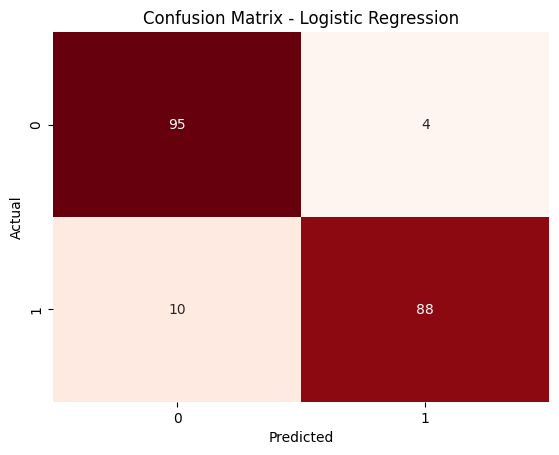

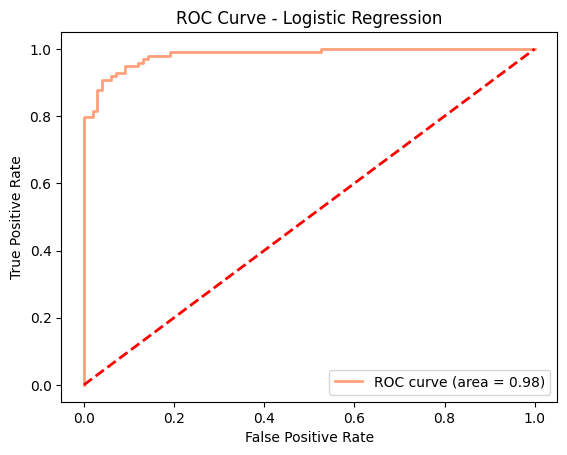

In [64]:
# Confusion Matrix and Visualization for Logistic Regression
conf_matrix_lr = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='lightsalmon', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()